<b>Audio and Music Processing Lab - Module 6</b><br>Andrea Poltronieri<br>andrea.poltronieri@upf.edu<br>05.03.2025
## AMPLab6 - Introduction to music21

Preliminary step: we need to patch the jams library to avoid a bug in the current version (incompatibility with the latest version of the numpy library). 

In [1]:
import numpy as np

# Monkey patch NumPy to add back the removed float_ type alias
if not hasattr(np, "float_"):
    np.float_ = np.float64

In [2]:
import jams
from harte.harte import Harte
from music21 import meter, stream


/Users/andreapoltronieri/Documents/Projects/AMPLab6/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# allow JAMS to recognize the time signature namespace

jams.schema.add_namespace("./timesig.json")

Then, we need to load out JAMS file, using the JAMS library.

In [4]:
file_name = "./biab-internet-corpus_1.jams"
jam = jams.load(file_name, validate=False)
# priint some metadata from the jam
print(jam.file_metadata.title)
print(jam.file_metadata.artist)

All God's Chillun Got Rhythm
Walter Jurmann


In [5]:
# get the chord annotations from the jam
chords = jam.annotations[0].data
print(f"The track contains {len(chords)} chords")

The track contains 53 chords


Now that we have the chords, we can use the harte library to convert harte chords into music21 chords. 

In [6]:
# convert the chord annotations to a list of music21 Chord objects
music21_chords = []
for chord_data in chords:
    chord_label = chord_data.value
    # skip chords with no label
    if chord_label == "N":
        continue
    # create a music21 Chord object
    music21_chord = Harte(chord_label)

    # decompose the onset information of the chord
    onset = chord_data.time
    beat, measure = str(onset).split(".")

    # add duration information to the chord
    music21_chord.duration.quarterLength = int(chord_data.duration)

    music21_chords.append(music21_chord)

    print(music21_chord.fullName)


Chord {C in octave 4 | E in octave 4 | G in octave 4 | B in octave 4} Half
Chord {A in octave 4 | C in octave 5 | E in octave 5 | G in octave 5} Half
Chord {D in octave 4 | F in octave 4 | A in octave 4 | C in octave 5} Half
Chord {G in octave 4 | B in octave 4 | D in octave 5 | F in octave 5} Half
Chord {E in octave 4 | G in octave 4 | B in octave 4 | D in octave 5} Half
Chord {A in octave 4 | C-sharp in octave 5 | E in octave 5 | G in octave 5 | B-flat in octave 4} Half
Chord {D in octave 4 | F in octave 4 | A in octave 4 | C in octave 5} Half
Chord {G in octave 4 | B in octave 4 | D in octave 5 | F in octave 5} Half
Chord {C in octave 4 | E in octave 4 | G in octave 4 | B in octave 4} Half
Chord {A in octave 4 | C in octave 5 | E in octave 5 | G in octave 5} Half
Chord {D in octave 4 | F in octave 4 | A in octave 4 | C in octave 5} Half
Chord {G in octave 4 | B in octave 4 | D in octave 5 | F in octave 5} Half
Chord {E in octave 4 | G in octave 4 | B-flat in octave 4 | D in octave 5

In [7]:
# print attributes for the first chord
print(music21_chords[0].fullName)
print(music21_chords[0].pitchedCommonName)
print(music21_chords[0].root())
print(music21_chords[0].bass())
print(music21_chords[0].inversion())
print(music21_chords[0].duration.quarterLength)

Chord {C in octave 4 | E in octave 4 | G in octave 4 | B in octave 4} Half
C-major seventh chord
C4
C4
0
2.0


Extract from the JAMS time signature and key information. To find them, we need to search for the "key_sig" and "timesig" namespace in the JAMS file. 

In [8]:
timesig = jam.search(namespace="timesig")[0].data
numerator = timesig[0].value["numerator"]
denominator = timesig[0].value["denominator"]
time_signature = meter.TimeSignature(f"{numerator}/{denominator}")
print(time_signature)

<music21.meter.TimeSignature 4/4>


In [9]:
key = jam.search(namespace="key")[0].data[0].value
key

'C:major'

Finally, we can use music21 to create a score with the chords and the melody.

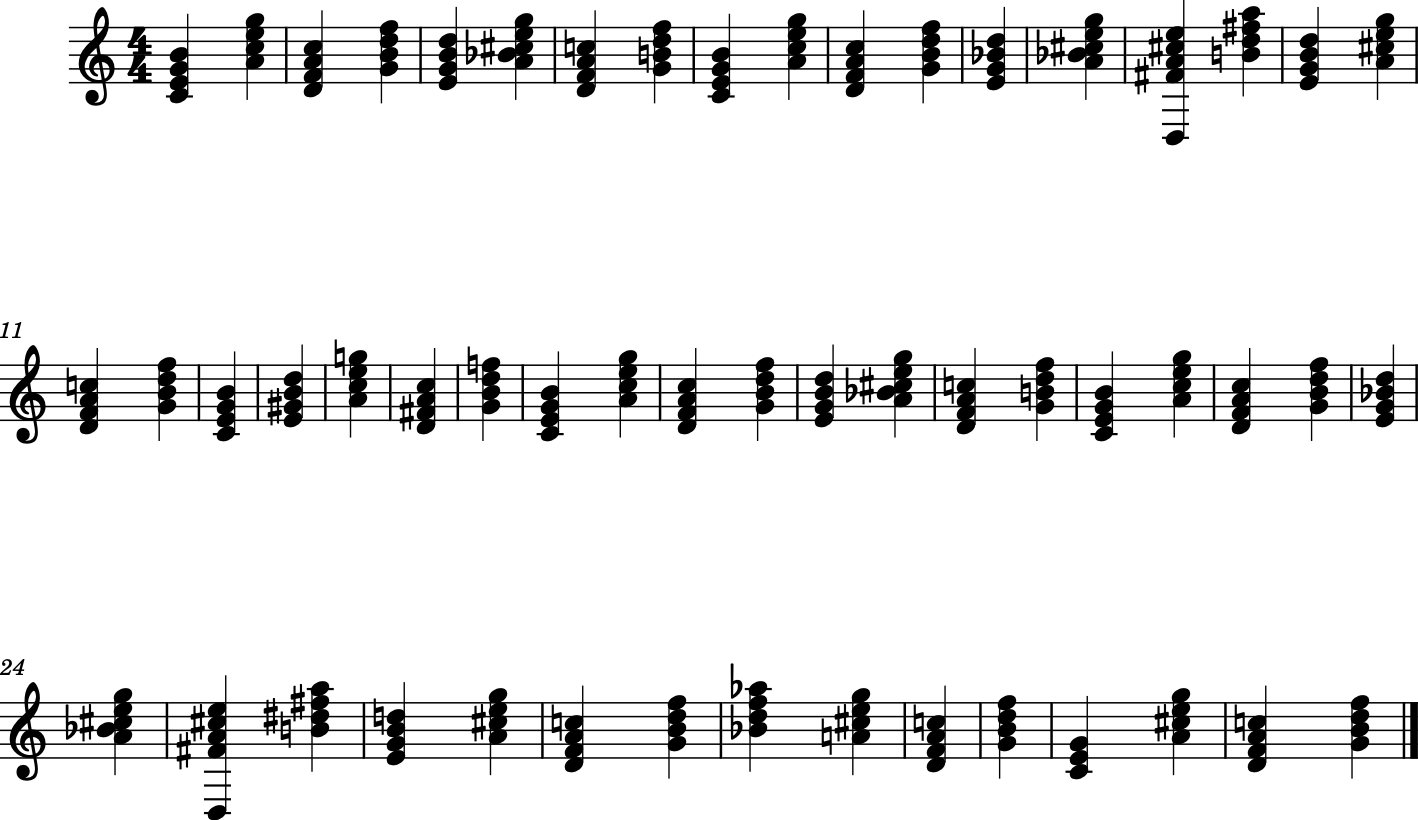

In [10]:
# create a music21 stream with the chords
s = stream.base.Stream()

# add to the stream the key signature and the time signature
s.append(time_signature)

# add chords
for music21_chord in music21_chords:
    s.append(music21_chord)

s.show()